In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [21]:
# Importing the dataset
dataset = pd.read_csv("Wine.csv")
dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [22]:
X = dataset.iloc[:, 0:13].values
y = dataset.iloc[:, 13].values

print(X)
print(X.shape)
print("\n")
print(y)
print(y.shape)

[[  1.42300000e+01   1.71000000e+00   2.43000000e+00 ...,   1.04000000e+00
    3.92000000e+00   1.06500000e+03]
 [  1.32000000e+01   1.78000000e+00   2.14000000e+00 ...,   1.05000000e+00
    3.40000000e+00   1.05000000e+03]
 [  1.31600000e+01   2.36000000e+00   2.67000000e+00 ...,   1.03000000e+00
    3.17000000e+00   1.18500000e+03]
 ..., 
 [  1.32700000e+01   4.28000000e+00   2.26000000e+00 ...,   5.90000000e-01
    1.56000000e+00   8.35000000e+02]
 [  1.31700000e+01   2.59000000e+00   2.37000000e+00 ...,   6.00000000e-01
    1.62000000e+00   8.40000000e+02]
 [  1.41300000e+01   4.10000000e+00   2.74000000e+00 ...,   6.10000000e-01
    1.60000000e+00   5.60000000e+02]]
(178, 13)


[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3

In [23]:
# splitting the data into te Training set and Test set
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
print(X_train)
print(X_train.shape)
print("\n")
print(X_test)
print(X_test.shape)
print("\n")
print(y_train)
print(y_train.shape)
print("\n")
print(y_test)
print(y_test.shape)

[[  1.36900000e+01   3.26000000e+00   2.54000000e+00 ...,   9.60000000e-01
    1.82000000e+00   6.80000000e+02]
 [  1.26900000e+01   1.53000000e+00   2.26000000e+00 ...,   9.60000000e-01
    2.06000000e+00   4.95000000e+02]
 [  1.16200000e+01   1.99000000e+00   2.28000000e+00 ...,   1.16000000e+00
    2.96000000e+00   3.45000000e+02]
 ..., 
 [  1.24200000e+01   1.61000000e+00   2.19000000e+00 ...,   1.06000000e+00
    2.96000000e+00   3.45000000e+02]
 [  1.39000000e+01   1.68000000e+00   2.12000000e+00 ...,   9.10000000e-01
    3.33000000e+00   9.85000000e+02]
 [  1.41600000e+01   2.51000000e+00   2.48000000e+00 ...,   6.20000000e-01
    1.71000000e+00   6.60000000e+02]]
(142, 13)


[[  1.37400000e+01   1.67000000e+00   2.25000000e+00   1.64000000e+01
    1.18000000e+02   2.60000000e+00   2.90000000e+00   2.10000000e-01
    1.62000000e+00   5.85000000e+00   9.20000000e-01   3.20000000e+00
    1.06000000e+03]
 [  1.27900000e+01   2.67000000e+00   2.48000000e+00   2.20000000e+01
    1.12

In [24]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying LDA

In [25]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

pca = LDA(n_components = 2)
# Fit to data, then transform it.
X_train = pca.fit_transform(X_train, y_train)
# Project data to maximize class separation.
X_test = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(explained_variance)
print("\n")

print(X_train)
print(X_train.shape)
print(X_test)
print(X_test.shape)

[ 0.73931691  0.26068309]


[[ 3.57315552  1.94018924]
 [ 0.85475898 -2.08182977]
 [ 0.62173655 -3.06234453]
 [ 4.80786412  2.00638739]
 [-3.8579759   0.14987256]
 [-3.59455458  1.24961706]
 [-0.53772906 -3.0852704 ]
 [ 0.04058577 -2.47312446]
 [ 0.99835348 -3.36989668]
 [-3.74095658  1.94844242]
 [ 3.76035226  0.82126218]
 [-0.15106412 -1.86820292]
 [ 3.62762899  2.05460026]
 [-3.94229781  2.80328429]
 [ 3.33429017  0.73627798]
 [ 3.90206871  1.03276135]
 [-3.55835472  0.18783108]
 [ 5.63175281  2.40524214]
 [-5.56217254  0.85694946]
 [ 0.23296188 -3.94615581]
 [ 5.03141997  3.23313754]
 [ 3.52861651  0.94605778]
 [-1.17815662 -2.17294825]
 [ 3.58320131  0.67947364]
 [ 5.21649905  2.41090952]
 [-3.01647841  1.24411621]
 [ 1.86178658 -0.47484926]
 [ 3.93816398 -0.2204059 ]
 [-1.0836235  -3.32496762]
 [ 1.8691488  -0.63362283]
 [ 3.27717205  1.51263542]
 [-0.47842302 -1.16766723]
 [-4.14433134  1.37391708]
 [ 2.45009727 -2.49336285]
 [-1.20844631 -2.30679956]
 [ 2.55631466 -0.98550214]


In [26]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [27]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
print(y_pred)

[1 3 2 1 2 2 1 3 2 2 3 3 1 2 3 2 1 1 2 1 2 1 1 2 2 2 2 2 2 3 1 1 2 1 1 1]


In [28]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_pred))

[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]


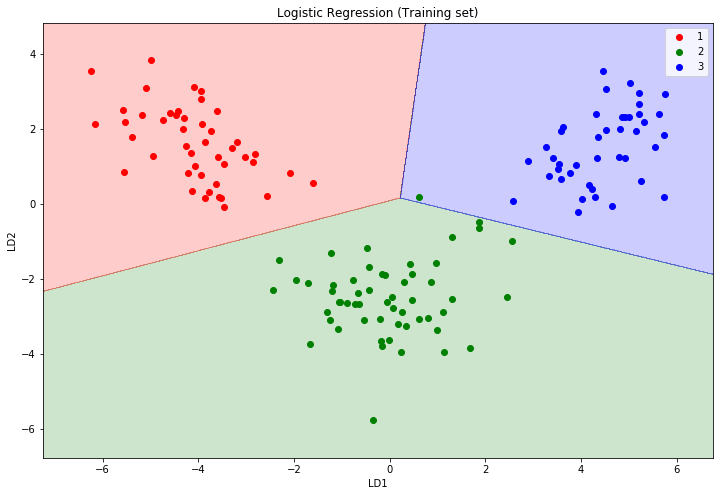

In [29]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (12, 8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
    
plt.title('Logistic Regression (Training set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()

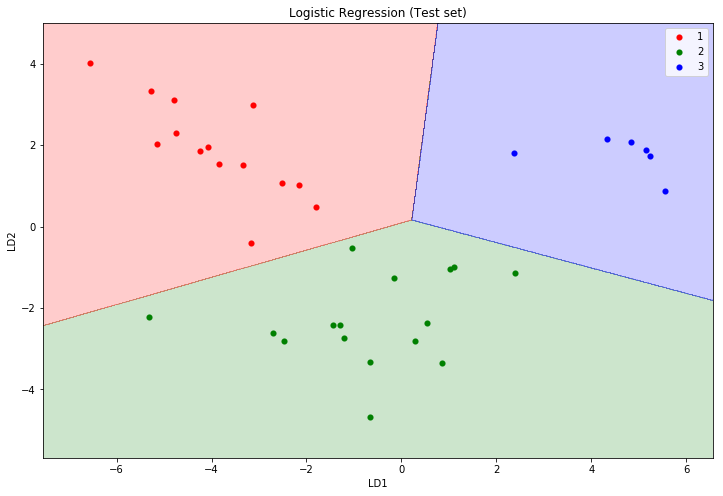

In [30]:
# Visualising the Tset set results
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))

plt.figure(figsize = (12, 8))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.2, cmap = ListedColormap(('red', 'green', "blue")))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', "blue"))(i), label = j, lw = 0.1)
    
plt.title('Logistic Regression (Test set)')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()